In [1]:
import h5py
import numpy as np
import vector
import awkward as ak
import uproot
import boost_histogram as bh
import mplhep as hep
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/broad/Documents/Documents/university/summer work/DNN_used/final_using_DNN_folder/"


In [30]:
file = h5py.File('DNN_output.h5', 'r')
nu_DNN = vector.zip({'px': np.array(file['DNN/nu_px']), 'py': np.array(file['DNN/nu_py']), 'pz': np.array(file['DNN/nu_pz']), 'm': 0})
nubar_DNN = vector.zip({'px': np.array(file['DNN/nubar_px']), 'py': np.array(file['DNN/nubar_py']), 'pz': np.array(file['DNN/nubar_pz']), 'm': 0})
file.close()

In [5]:
tree = uproot.open(path+"ttbar_skimmed_july9_v2.root:truth")
treerecon = uproot.open(path+"ttbar_skimmed_july9_v2.root:recon")
mask_truth_in_recon = np.isin(tree["eventNumber"].array(),treerecon["eventNumber"].array())
mask_recon_in_truth = np.isin(treerecon["eventNumber"].array(), tree["eventNumber"].array())

nu_truth = vector.zip({'pt': tree["nu_pt"].array(), 'eta': tree["nu_eta"].array(), 'phi': tree["nu_phi"].array(), 'm': tree["nu_mass"].array()})[mask_truth_in_recon]
nubar_truth = vector.zip({'pt': tree["nubar_pt"].array(), 'eta': tree["nubar_eta"].array(), 'phi': tree["nubar_phi"].array(), 'm': tree["nubar_mass"].array()})[mask_truth_in_recon]

nu_EM = vector.zip({'pt': treerecon["EM_nu_pt"].array(), 'eta': treerecon["EM_nu_eta"].array(), 'phi': treerecon["EM_nu_phi"].array(), 'm': treerecon["EM_nu_m"].array()})[mask_recon_in_truth]
nubar_EM = vector.zip({'pt': treerecon["EM_nubar_pt"].array(), 'eta': treerecon["EM_nubar_eta"].array(), 'phi': treerecon["EM_nubar_phi"].array(), 'm': treerecon["EM_nubar_m"].array()})[mask_recon_in_truth]
nu_SN = vector.zip({'pt': treerecon["SN_nu_pt"].array(), 'eta': treerecon["SN_nu_eta"].array(), 'phi': treerecon["SN_nu_phi"].array(), 'm': treerecon["SN_nu_m"].array()})[mask_recon_in_truth]
nubar_SN = vector.zip({'pt': treerecon["SN_nubar_pt"].array(), 'eta': treerecon["SN_nubar_eta"].array(), 'phi': treerecon["SN_nubar_phi"].array(), 'm': treerecon["SN_nubar_m"].array()})[mask_recon_in_truth]
nu_NW = vector.zip({'pt': treerecon["NW_nu_pt"].array(), 'eta': treerecon["NW_nu_eta"].array(), 'phi': treerecon["NW_nu_phi"].array(), 'm': treerecon["NW_nu_m"].array()})[mask_recon_in_truth]
nubar_NW = vector.zip({'pt': treerecon["NW_nubar_pt"].array(), 'eta': treerecon["NW_nubar_eta"].array(), 'phi': treerecon["NW_nubar_phi"].array(), 'm': treerecon["NW_nubar_m"].array()})[mask_recon_in_truth]

In [6]:
# #OPTIONAL DONE NOW SO I CAN COMPARE DNN RESULTS TO NEUTRONS! NEURAL NETWORK DOESNT SEEM TO WORK WHEN THIS IS INPUTTED
remove_un_found_events_mask = ((nu_EM.pt>-1) & (nu_EM.pt>-1) & (nu_SN.pt>-1) & (nu_SN.pt>-1) & (nu_NW.pt>-1) & (nu_NW.pt>-1))
nu_EM = nu_EM[remove_un_found_events_mask][-len(nu_DNN):]
nubar_EM = nubar_EM[remove_un_found_events_mask][-len(nu_DNN):]
nu_SN = nu_SN[remove_un_found_events_mask][-len(nu_DNN):]
nubar_SN = nubar_SN[remove_un_found_events_mask][-len(nu_DNN):]
nu_NW = nu_NW[remove_un_found_events_mask][-len(nu_DNN):]
nubar_NW = nubar_NW[remove_un_found_events_mask][-len(nu_DNN):]
nu_truth = nu_truth[remove_un_found_events_mask][-len(nu_DNN):]
nubar_truth = nubar_truth[remove_un_found_events_mask][-len(nu_DNN):]

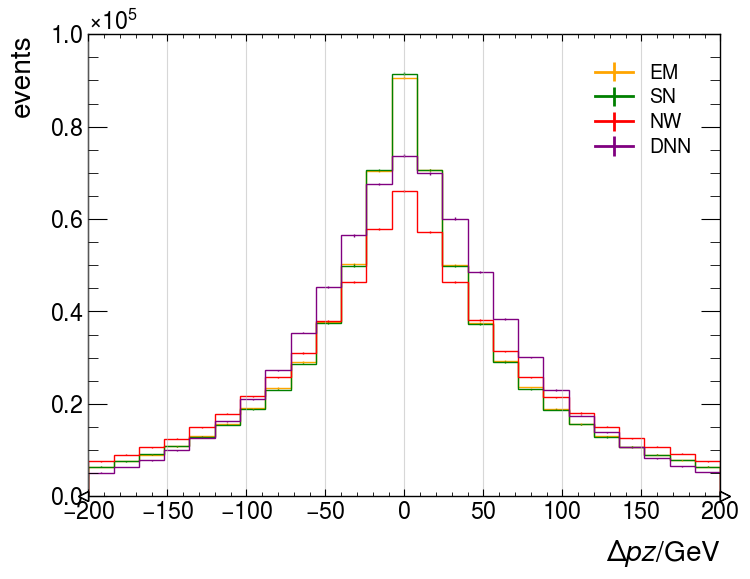

In [54]:
def differenceplotter(data1,data2,data3,label1,label2,label3,title,x_axis_label,y_axis_label,bins,xmin,xmax,save,data4,label4):
    # Use the ATLAS style for the plot
    hep.style.use(hep.style.ATLAS)

    # Create histograms with the specified bins
    hist1 = bh.Histogram(bh.axis.Regular(bins, xmin, xmax))  
    hist2 = bh.Histogram(bh.axis.Regular(bins, xmin, xmax)) 
    hist3 = bh.Histogram(bh.axis.Regular(bins, xmin, xmax)) 
    hist4 = bh.Histogram(bh.axis.Regular(bins, xmin, xmax)) 
    # Fill the histograms with the data
    hist1.fill(data1) 
    hist2.fill(data2)  
    hist3.fill(data3)
    hist4.fill(data4)

 


    # Main plot
    hep.histplot(hist1, label=label1, color = "orange", lw=1, linestyle = "-")
    hep.histplot(hist2, label=label2, color = "green", lw=1, linestyle="-")
    hep.histplot(hist3, label=label3, color = "red", lw=1, linestyle="-")
    hep.histplot(hist4, label=label4, color = "purple", lw=1, linestyle="-")
    plt.ylabel(y_axis_label)
    plt.legend()

    plt.xlabel(x_axis_label)
    if save is True:
        plt.savefig(f"plots/{title}.png", dpi=800)
    plt.grid(True, alpha=0.5, which="major", axis="x")
    plt.show()
    
data1=((nu_truth).pz-(nu_EM).pz)
data2=((nu_truth).pz-(nu_SN).pz)
data3=((nu_truth).pz-(nu_NW).pz)
data4=((nu_truth).pz-(nu_DNN).pz)


label1 = "EM"
label2 = "SN"
label3 = "NW"
label4 = "DNN"


title = "pz"
x_axis_label = r'${\Delta}pz$/GeV'
y_axis_label = "events"
bins=25
xmin=-200
xmax=200
save=True
differenceplotter(data1,data2,data3,label1,label2,label3,title,x_axis_label,y_axis_label,bins,xmin,xmax,save,data4,label4)



In [39]:
(nu_EM).px

<Array [17.7, -14.7, 5.17, ..., -34, -0.913, 72.2] type='770552 * float32'>

In [9]:
file = h5py.File('results.h5', 'r')
results_eventnumber = np.array(file["event/eventnumber"])
results_b = vector.zip({'pt': np.array(file["bjet/pt"]), 'phi': np.array(file["bjet/phi"]), 'eta': np.array(file["bjet/eta"]), 'm': np.array(file["bjet/m"])})
results_bbar = vector.zip({'pt': np.array(file["bbarjet/pt"]), 'phi': np.array(file["bbarjet/phi"]), 'eta': np.array(file["bbarjet/eta"]), 'm': np.array(file["bbarjet/m"])})
results_lep_pos = vector.zip({'pt': np.array(file["positive_lep/pt"]), 'phi': np.array(file["positive_lep/phi"]), 'eta': np.array(file["positive_lep/eta"]), 'm': np.array(file["positive_lep/m"])})
results_lep_neg = vector.zip({'pt': np.array(file["negative_lep/pt"]), 'phi': np.array(file["negative_lep/phi"]), 'eta': np.array(file["negative_lep/eta"]), 'm': np.array(file["negative_lep/m"])})
file.close()

In [10]:
#get truth top antitop vectors
truth_top = vector.zip({'pt': tree["t_pt"].array(), 'eta': tree["t_eta"].array(), 'phi': tree["t_phi"].array(), 'm': tree["t_mass"].array()})[mask_truth_in_recon][remove_un_found_events_mask][-len(nu_DNN):]
truth_antitop = vector.zip({'pt': tree["tbar_pt"].array(), 'eta': tree["tbar_eta"].array(), 'phi': tree["tbar_phi"].array(), 'm': tree["tbar_mass"].array()})[mask_truth_in_recon][remove_un_found_events_mask][-len(nu_DNN):]
truth_b = vector.zip({'pt': tree["b_pt"].array(), 'eta': tree["b_eta"].array(), 'phi': tree["b_phi"].array(), 'm': tree["b_mass"].array()})[mask_truth_in_recon][remove_un_found_events_mask][-len(nu_DNN):]
truth_bbar = vector.zip({'pt': tree["bbar_pt"].array(), 'eta': tree["bbar_eta"].array(), 'phi': tree["bbar_phi"].array(), 'm': tree["bbar_mass"].array()})[mask_truth_in_recon][remove_un_found_events_mask][-len(nu_DNN):]
truth_lep_neg= vector.zip({'pt': tree["lp_pt"].array(), 'eta': tree["lp_eta"].array(), 'phi': tree["lp_phi"].array(), 'm': tree["lp_mass"].array()})[mask_truth_in_recon][remove_un_found_events_mask][-len(nu_DNN):]
truth_lep_pos = vector.zip({'pt': tree["lm_pt"].array(), 'eta': tree["lm_eta"].array(), 'phi': tree["lm_phi"].array(), 'm': tree["lm_mass"].array()})[mask_truth_in_recon][remove_un_found_events_mask][-len(nu_DNN):]

In [11]:
results_eventnumber

array([11404600, 11404840, 11402140, ..., 47057680, 47056650, 47056050],
      dtype=uint64)

In [12]:
truth_ttbar = truth_top + truth_antitop

In [13]:
EM_top = nubar_EM + truth_b + truth_lep_pos
EM_antitop = nu_EM + truth_bbar + truth_lep_neg
EM_ttbar = EM_top+EM_antitop

SN_top = nubar_SN + truth_b + truth_lep_pos
SN_antitop = nu_SN + truth_bbar + truth_lep_neg
SN_ttbar = SN_top+SN_antitop

DNN_top = nubar_DNN + truth_b + truth_lep_pos
DNN_antitop = nu_DNN + truth_bbar + truth_lep_neg
DNN_ttbar = DNN_top+DNN_antitop

DNN_2_top = nubar_DNN_2 + truth_b + truth_lep_pos
DNN_2_antitop = nu_DNN_2 + truth_bbar + truth_lep_neg
DNN_2_ttbar = DNN_2_top+DNN_2_antitop

DNN_combined_top = nubar_combined + truth_b + truth_lep_pos
DNN_combined_antitop = nu_combined + truth_bbar + truth_lep_neg
DNN_combined_ttbar = DNN_combined_top+DNN_combined_antitop

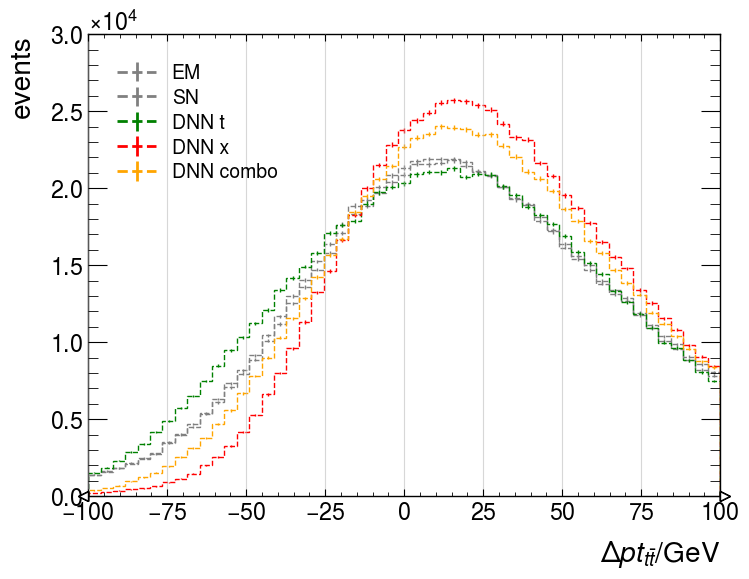

In [14]:
data1=truth_top.pt-(EM_top).pt
data2=truth_top.pt-(SN_top).pt
data3=truth_top.pt-(DNN_top).pt
data4=truth_top.pt-(DNN_2_top).pt
data5=truth_top.pt-(DNN_combined_top).pt

label1 = "EM"
label2 = "SN"
label3 = "DNN t"
label4 = "DNN x"
label5 =  "DNN combo"

title = "pt_top"
x_axis_label = r'${\Delta}pt_{t\bar{t}}$/GeV'
y_axis_label = "events"
bins=51
xmin=-100
xmax=100
save=True
differenceplotter(data1,data2,data3,label1,label2,label3,title,x_axis_label,y_axis_label,bins,xmin,xmax,save,data4,label4,data5,label5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


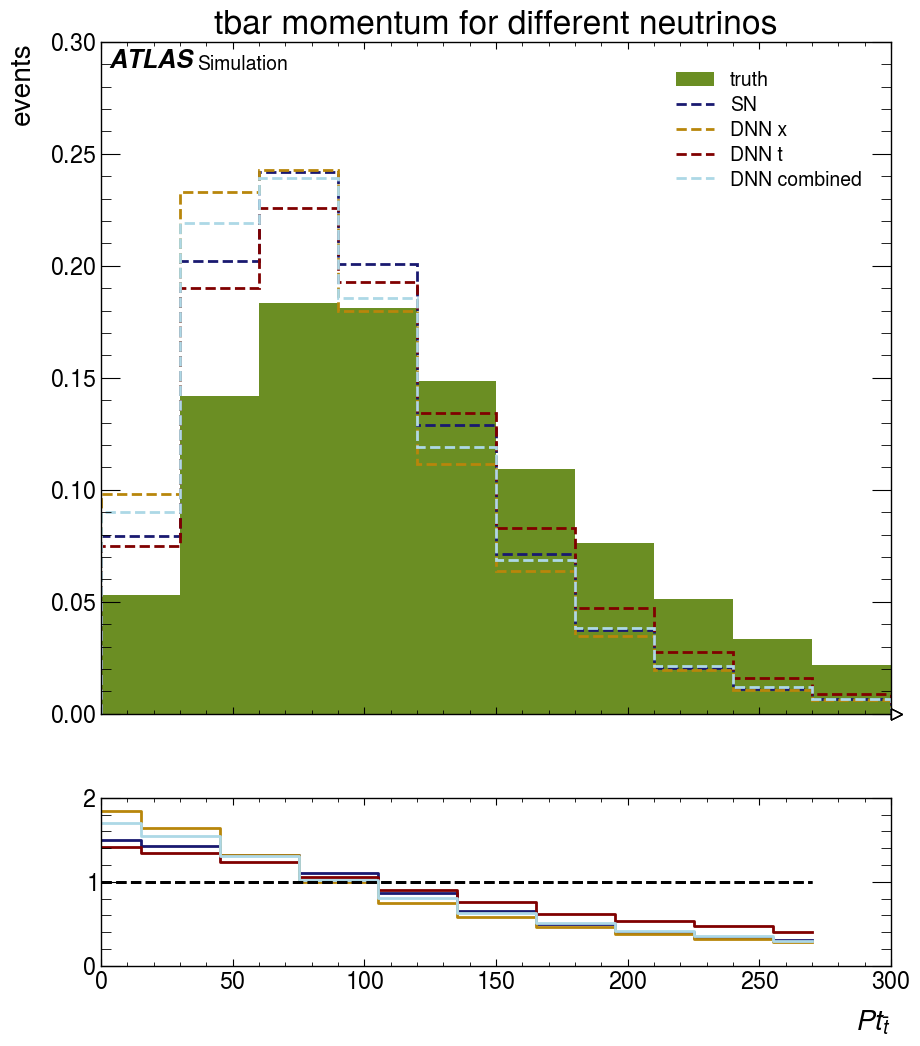

In [15]:
#plot graphs for truth and recon ttbar kinematics
#invariant mas not looking right for reconstructed

def originalplotter(data1,data2,data3,label1,label2,label3,title,x_axis_label,y_axis_label,bins,xmin,xmax,data4,label4,save,data5,label5):
    # Use the ATLAS style for the plot
    hep.style.use(hep.style.ATLAS)

    # Create histograms with the specified bins
    hist1 = bh.Histogram(bh.axis.Regular(bins, xmin, xmax))  
    hist2 = bh.Histogram(bh.axis.Regular(bins, xmin, xmax)) 
    hist3 = bh.Histogram(bh.axis.Regular(bins, xmin, xmax)) 
    hist4 = bh.Histogram(bh.axis.Regular(bins, xmin, xmax))
    hist5 = bh.Histogram(bh.axis.Regular(bins, xmin, xmax))


    # Fill the histograms with the data
    hist1.fill(data1) 
    hist2.fill(data2)  
    hist3.fill(data3)
    hist4.fill(data4)
    hist5.fill(data5)
    
    hist1 /= hist1.sum()
    hist2 /= hist2.sum()
    hist3 /= hist3.sum()
    hist4 /= hist4.sum()
    hist5 /= hist5.sum()


    # Plot the histograms
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 12))

    # Main plot
    hep.histplot(hist1, label=label1, ax=ax1, color = "olivedrab", lw=2, histtype="fill"  )
    hep.histplot(hist2, label=label2, ax=ax1, color = "midnightblue", lw=2, linestyle = "--")
    hep.histplot(hist4, label=label4, ax=ax1, color = "darkgoldenrod", lw=2, linestyle="--")
    hep.histplot(hist3, label=label3, ax=ax1, color = "maroon", lw=2, linestyle="--")
    hep.histplot(hist5, label=label5, ax=ax1, color = "lightblue", lw=2, linestyle="--")

    ax1.set_title(title)
    ax1.set_xlabel("")
    ax1.set_ylabel(y_axis_label)
    ax1.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
    ax1.legend()

    # Calculate the ratio/residuals
    ratio1 = hist2.view() / hist1.view()
    ratio2 = hist3.view() / hist1.view()
    ratio3 = hist4.view() / hist1.view()
    ratio4 = hist5.view() / hist1.view()


    # Plot the ratio/residuals
    edges = hist1.axes[0].edges

    ax2.step(edges[:-1], ratio1, where='mid', color = "midnightblue", lw=2)
    ax2.step(edges[:-1], ratio2, where='mid', color = "maroon", lw=2)
    ax2.step(edges[:-1], ratio3, where='mid', color = "darkgoldenrod", lw=2)
    ax2.step(edges[:-1], ratio4, where='mid', color = "lightblue", lw=2)
    ax2.step(edges[:-1], np.ones((bins,2)), where='mid', color = "black", linestyle="--")
    ax2.set_xlabel(x_axis_label)
    ax2.legend()

    hep.atlas.label(ax=ax1, rlabel="")
    text1 = ax1.texts[0]
    text2=ax1.texts[1]

        # Set new position using normalized figure coordinates (0 to 1 range)
    text1.set_position((0.01, 0.99)) 
    text2.set_position((0.01,0.99))
    

    if save is True:
        plt.savefig(f"plots/{title}.png", dpi=500)
        plt.show()
    
data1=truth_top.pt
data2=(SN_top).pt
data3=(DNN_top).pt
data4=(DNN_2_top).pt
data5=(DNN_combined_top).pt


label1 = "truth"
label2 = "SN"
label3 = "DNN t"
label4 = "DNN x"
label5= "DNN combined"


title = "tbar momentum for different neutrinos"
x_axis_label = r'$Pt_{\bar{t}}$'
y_axis_label = "events"
bins=10
xmin=0
xmax=300
save=True
originalplotter(data1,data2,data3,label1,label2,label3,title,x_axis_label,y_axis_label,bins,xmin,xmax,data4,label4,save,data5,label5)